In [21]:
import scipy
from numpy import r_
from scipy.fftpack import dct, idct
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from numpy import pi

# read lena image 
im = imread('lenna512.bmp')


In [22]:
import math

def dct_transform(image,M,N):
    
    #declaration des tableaux
    Ci=np.zeros((M))
    Cj=np.zeros((N))
    cos1= np.zeros((M,M))
    cos2= np.zeros((N,N))
    Sum = np.zeros((M,N))
    Dct = np.zeros((M,N))   
    
    #initialisation de Ci
    Ci[0] = 1/ math.sqrt(2)
    Ci[1:M]= 1
    
    #initialisation de Cj
    Cj[0] = 1/math.sqrt(2)
    Cj[1:N]= 1   
    
    # Calcul des tableaux cosinus
    temp1 = np.zeros((1,M))
    temp1[0,0:M] = np.arange((M))
    temp3 = np.zeros((M,1))
    temp3 [0:M,0] = np.arange((M))
    temp2= 2*temp1+1
    temp4 = pi * temp3
    temp5 = temp2*temp4 
    temp5=temp5/(2*M)
    cos1 = np.cos(temp5)   
    
    temp1 = np.zeros((1,N))
    temp1[0,0:N] = np.arange((N))
    temp3 = np.zeros((N,1))
    temp3 [0:N,0] = np.arange((N))
    temp2= 2*temp1+1
    temp4 = pi * temp3
    temp5 = temp2*temp4 
    temp5=temp5/(2*N)
    cos2 = np.cos(temp5)
      
    for i in range(0,M):
        for j in range(0,N): 
            for u in range(0,M):
                for v in range(0,N):
                    Sum[i,j] = Sum[i,j]+ (image[u,v]* cos1[i,u]* cos2[j,v])  
             
    #Calcul de la Dct
    Dct[0:M,0:N] = (1/math.sqrt(M*N))*2 * Ci[0:M] * Cj[0:N] * Sum[0:M,0:N]
    
    return Dct

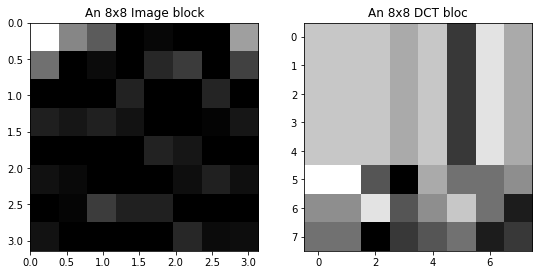

In [23]:
pos=0
pos_max = 8
plt.figure(figsize=(9,15))
our_dct = dct_transform(im[pos:pos_max,pos:pos_max],pos_max,pos_max)
# Extract a block from image
plt.subplot(121) ,plt.imshow(our_dct,cmap='gray',vmax= np.max(our_dct)*0.01,vmin = 0, extent=[0,pi,pi,0]),plt.title( "An 8x8 Image block")
# Display the dct of that block

plt.subplot(122),plt.imshow(im[pos:pos_max,pos:pos_max],cmap='gray'),plt.title( "An 8x8 DCT bloc")
plt.show()

In [24]:
from scipy.fftpack import dct, idct
import matplotlib.pylab as plt

# implement 2D DCT

def dct2(image):
    return scipy.fftpack.dct( scipy.fftpack.dct( image, axis=0, norm='ortho' ), axis=1, norm='ortho' )
# implement 2D IDCT
  
def idct2(image):
    return scipy.fftpack.idct( scipy.fftpack.idct( image, axis=0 , norm='ortho'), axis=1 , norm='ortho')



<Figure size 432x288 with 0 Axes>

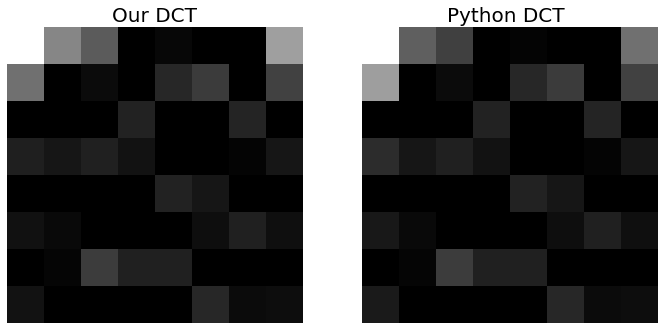

In [25]:
dct_python = dct2(im[pos:pos_max,pos:pos_max])

# plot python and programmed dct with matplotlib.pylab
plt.gray()
fig = plt.figure(figsize=(18,30)) 
plt.subplot(131), plt.imshow(our_dct,cmap='gray',vmax= np.max(our_dct)*0.01,vmin = 0, extent=[0,pi,pi,0]), plt.axis('off'), plt.title('Our DCT', size=20)
plt.subplot(132), plt.imshow(dct_python,cmap='gray',vmax= np.max(dct_python)*0.01,vmin = 0, extent=[0,pi,pi,0]), plt.axis('off'), plt.title('Python DCT ', size=20)
plt.show()

<Figure size 432x288 with 0 Axes>

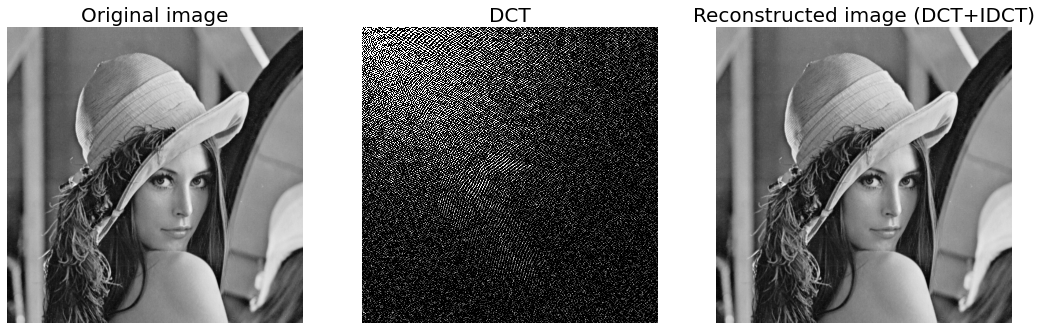

In [26]:
imF = dct2(im)
im1 = idct2(imF)

# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)

# plot original and reconstructed images with matplotlib.pylab
plt.gray()
fig = plt.figure(figsize=(18,30)) 
plt.subplot(131), plt.imshow(im), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(132),plt.imshow(imF,cmap='gray',vmax= np.max(imF)*0.0001,vmin = 0, extent=[0,pi,pi,0]),plt.axis('off'), plt.title('DCT', size=20)
plt.subplot(133), plt.imshow(im1), plt.axis('off'), plt.title('Reconstructed image (DCT+IDCT)', size=20)

plt.show()

Text(0.5, 1.0, '8x8 DCTs of the image')

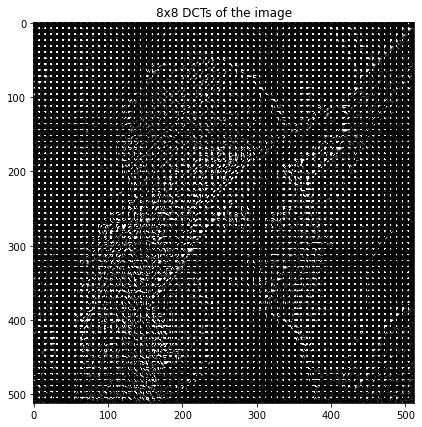

In [27]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )
        
        
# Display entire DCT
fig = plt.figure(figsize=(7,7)) 
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

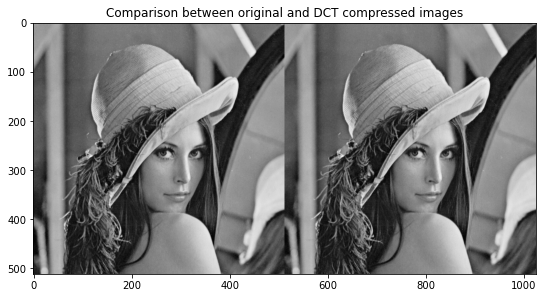

In [28]:
im_dct = np.zeros(imsize)
#Decomposer la DCT en bloc 8*8 et appliquer la DCT inverse sur chaque bloc
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
        
#Affichage du resultat        
fig = plt.figure(figsize=(9,15))   
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )    
    

In [29]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

# im : original image / im1 : Reconstructed image
print(mse(im,im1))

2.2089802571951822e-27


In [30]:
### PARTIE 2 #####

def table_de_ponderation (Q) :
    TabQ = np.zeros((8,8))
    Tab50 = np.array(
            [[16, 11, 10, 16, 24, 40, 51, 61],
             [12, 12, 14, 19, 26, 58, 60, 55],
             [14, 13, 16, 24, 40, 57, 69, 56],
             [14, 17, 22, 29, 51, 87, 80, 62],
             [18, 22, 37, 56, 68, 109, 103, 77],
             [24, 35, 55, 64, 81, 104, 113, 92],
             [49, 64, 78, 87, 103, 121, 120, 101],
             [72, 92, 95, 98, 112, 100, 103, 99]
            ])
    
    if(Q<50):
        E = 50/Q
    else :
        E = 2 - (Q/50)
        
    TabQ = Tab50 * E + 0.5
    
    return TabQ

  
def ponderation(Bloc , TabQ):
    BlocPondere = np.zeros((8,8))
    for i in range(0,8):
        for j in range(0,8):
            BlocPondere[i,j] = Bloc[i,j] / TabQ[i,j]
            BlocPondere[i,j] = round(BlocPondere[i,j])          
    return BlocPondere


def quantifier(imsize,dct,TabQ):
    dct_quantifie= np.zeros(imsize)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct_quantifie[i:(i+8),j:(j+8)] = ponderation( dct[i:(i+8),j:(j+8)],TabQ)
    return dct_quantifie

def deponderation(BlocPondere , TabQ):
    Bloc = BlocPondere * TabQ
    return Bloc

def quantification_inverse(dct_quantifie,TabQ):
    dct= np.zeros(imsize)
    for i in r_[:imsize[0]:8]:
        for j in r_[:imsize[1]:8]:
            dct[i:(i+8),j:(j+8)] = deponderation( dct_quantifie[i:(i+8),j:(j+8)],TabQ)
    return dct

In [31]:
Tab10 = table_de_ponderation(10)
dct_quantifie_10 = quantifier(imsize,dct,Tab10)
dct_dequantifie_10 = quantification_inverse(dct_quantifie_10 , Tab10)
im_dct_dequantifie_10 = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_dequantifie_10[i:(i+8),j:(j+8)] = idct2( dct_quantifie_10[i:(i+8),j:(j+8)] )

Tab50 = table_de_ponderation(50)
dct_quantifie_50 = quantifier(imsize,dct,Tab50)
dct_dequantifie_50 = quantification_inverse(dct_quantifie_50 , Tab50)
im_dct_dequantifie_50 = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_dequantifie_50[i:(i+8),j:(j+8)] = idct2( dct_quantifie_50[i:(i+8),j:(j+8)] )

Tab80 = table_de_ponderation(80)
dct_quantifie_80 = quantifier(imsize,dct,Tab80)
dct_dequantifie_80 = quantification_inverse(dct_quantifie_80 , Tab80)
im_dct_dequantifie_80 = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct_dequantifie_80[i:(i+8),j:(j+8)] = idct2( dct_quantifie_80[i:(i+8),j:(j+8)] )

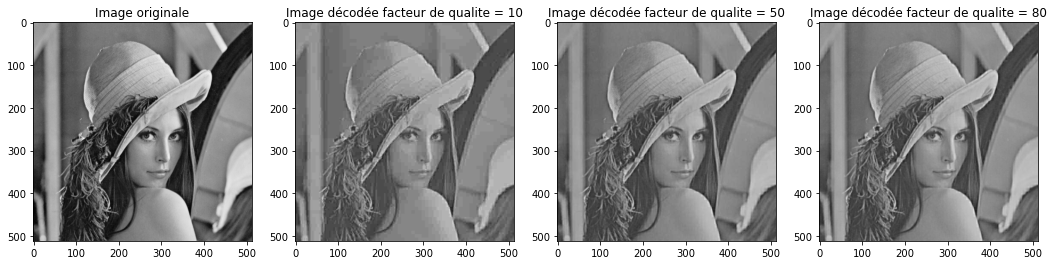

In [32]:
   
fig = plt.figure(figsize=(18,30)) 
original = fig.add_subplot(1,4,1)
original.title.set_text('Image originale')
plt.imshow(im)

ImageDecode_10 = fig.add_subplot(1,4,2)
ImageDecode_10.title.set_text('Image décodée facteur de qualite = 10')
plt.imshow(im_dct_dequantifie_10)

ImageDecode_50 = fig.add_subplot(1,4,3)
ImageDecode_50.title.set_text('Image décodée facteur de qualite = 50')
plt.imshow(im_dct_dequantifie_50)

ImageDecode_80 = fig.add_subplot(1,4,4)
ImageDecode_80.title.set_text('Image décodée facteur de qualite = 80')
plt.imshow(im_dct_dequantifie_80)


In [33]:
mse_10 = mse(im,im_dct_dequantifie_10)
mse_50 = mse(im,im_dct_dequantifie_50)
mse_80 = mse(im,im_dct_dequantifie_80)

print( "Facteur de qualité = 10 , mse = " , mse_10)
print( "Facteur de qualité = 50 , mse = " , mse_50)
print( "Facteur de qualité = 80 , mse = " , mse_80)

Facteur de qualité = 10 , mse =  17239.781143971424
Facteur de qualité = 50 , mse =  15592.043783331965
Facteur de qualité = 80 , mse =  12909.136993514512


In [34]:
def compute_psnr(img1, img2):
    img1 = img1.astype(np.float64) / 255. 
    img2 = img2.astype(np.float64) / 255.
    mseVal = mse(img1,img2)
    if mseVal == 0:
        return "Same Image"
    return 10 * math.log10(1. / mseVal)

In [35]:
print("Facteur de qualité = 10 , psnr = ", compute_psnr(im,im_dct_dequantifie_10))
print("Facteur de qualité = 50 , psnr = ",compute_psnr(im,im_dct_dequantifie_50))
print("Facteur de qualité = 80 , psnr = ",compute_psnr(im,im_dct_dequantifie_80))

Facteur de qualité = 10 , psnr =  5.765486126372702
Facteur de qualité = 50 , psnr =  6.201773152334113
Facteur de qualité = 80 , psnr =  7.021831512492294


In [36]:
def parcours_zigzag(x,y,bloc,size,tab,curseur):
    
    if x==0 and y==0 :
        tab[curseur] = bloc[x,y]
        curseur=curseur+1       
        
    if x == 0 : 
        y = y+1
        tab[curseur] = bloc[x,y]
        curseur=curseur+1
        while y>0 :
            x = x+1
            y = y-1
            tab[curseur] = bloc[x,y]
            curseur=curseur+1
            parcours_zigzag(x,y,bloc,size,tab,curseur)
            
    if y == 0 and x!= size-1: 
        x = x+1
        tab[curseur] = bloc[x,y]
        curseur=curseur+1
        while x>0 :
            x = x-1
            y = y+1
            tab[curseur] = bloc[x,y]
            curseur=curseur+1
            parcours_zigzag(x,y,bloc,size,tab,curseur)
            
    if x == size-1 :
        y = y+1
        tab[curseur] = bloc[x,y]
        curseur=curseur+1
        if x == size-1 and y == size -1 :
            return 0
        else :
            while y< size-1 :
                x = x-1
                y = y+1
                tab[curseur] = bloc[x,y]
                curseur=curseur+1
                parcours_zigzag(x,y,bloc,size,tab,curseur)
                
    if y == size-1 :
        x = x+1
        tab[curseur] = bloc[x,y]
        curseur=curseur+1
        while x<size-1 :
            x = x+1
            y = y-1
            tab[curseur] = bloc[x,y]
            curseur=curseur+1
            parcours_zigzag(x,y,bloc,size,tab,curseur)

In [37]:
print("Bloc de 8*8 choisi aléatoirement : \n",im[32:40,50:58])
tableau = np.zeros((64))
parcours_zigzag(0,0,im[32:40,50:58],8,tableau,0)
print("\n Son tableau monodimentionnel equivalent aprés une lecture en ZIGZAG  : \n",tableau)

Bloc de 8*8 choisi aléatoirement : 
 [[159 161 159 164 157 153 154 147]
 [160 164 164 157 156 152 149 142]
 [159 163 161 158 153 152 148 141]
 [166 162 163 158 153 155 145 143]
 [161 160 159 160 156 152 148 139]
 [161 160 161 160 155 149 144 139]
 [162 161 163 157 152 152 143 138]
 [163 162 158 155 156 153 145 145]]

 Son tableau monodimentionnel equivalent aprés une lecture en ZIGZAG  : 
 [159. 161. 160. 159. 164. 159. 164. 164. 163. 166. 161. 162. 161. 157.
 157. 153. 156. 158. 163. 160. 161. 162. 160. 159. 158. 153. 152. 154.
 147. 149. 152. 153. 160. 161. 161. 163. 162. 163. 160. 156. 155. 148.
 142. 141. 145. 152. 155. 157. 158. 155. 152. 149. 148. 143. 139. 144.
 152. 156. 153. 143. 139. 138. 145. 145.]
